In [882]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy
import scipy.constants as const
import math
from scipy import stats
from scipy.stats import t
import statistics
from scipy.optimize import curve_fit

In [883]:
#creating dataset
data=pd.read_csv("FIRAS_DA/firas_monopole_spec_v2.txt" ,header = None) 
size= len(data[0]) #number of entries
dataset=[np.zeros(size)]
for j in range(size):
    dataset.append([float(i) for i in data[0][j].split()])
dataset=dataset[1:]

In [884]:
#Adding header names
with open('data_file.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Frequency','Residual1','Residual2','Uncertainty','GalaxySpec'])
    writer.writerows(dataset)


In [885]:
#storing columns as individual lists
data_final=pd.read_csv("data_file.csv")
frequency=data_final['Frequency'].tolist()
residual1=data_final['Residual1'].tolist()
residual2=data_final['Residual2'].tolist()
uncertainty=data_final['Uncertainty'].tolist()
galaxy=data_final['GalaxySpec'].tolist()


In [886]:
#Defining constants
h=const.h #Planck's Constant
k=const.k #Boltzmann Constant
c=const.c #Speed of Light
print(h,k)

6.62607015e-34 1.380649e-23


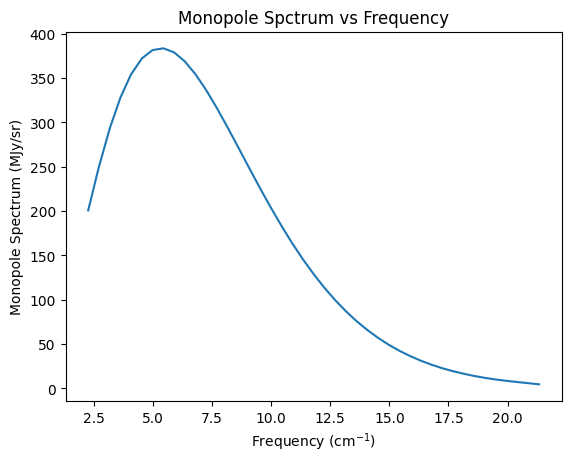

In [887]:
#Plotting monopole spectrum vs frequency
size=len(frequency)
'''
t=[np.zeros(size)]
for i in range(size):
    t.append(residual1[i]-residual2[i]/10**3)
t=t[1:]
plt.plot(frequency,t)
'''
plt.plot(frequency,residual1)
plt.title('Monopole Spctrum vs Frequency')
plt.ylabel('Monopole Spectrum (MJy/sr)')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.savefig("Monopole Spctrum vs Frequency")

In [888]:
# Defining the x parameter (independent variable)
#x=h*frequency/k
size=len(frequency)
x=[np.zeros(size)]
f=[np.zeros(size)]
for i in range(len(frequency)):
    f=c*frequency[i]*100 # converting to SI unit: Hz
    x.append((h*f)/k)
x=x[1:]


In [889]:
# Defining G based on the intensity of the monopole spectrum (dimensionless parameter)
G=[np.zeros(size)]
r=0
n=0
d=0
for i in range(size):
    R=residual1[i]*1.25664e-19 # Monopole Spectrum (SI Units)
    g=galaxy[i]*1.25664e-22   # Galaxy Spectrum (SI Units)
    r=residual2[i]*1.25664e-22 #residuals (SI Units)
    '''n=n+(residual2[i]/uncertainity[i])**2
    d=d+(1/(uncertainity[i]*1.25664e-22)**2)
    go=np.sqrt(n/d)'''

    f=c*frequency[i]*100
    I=R-g # Monopole Spectrum-Galatic distortions
    G.append(((c**2)/(2*h*f**3))*I)

G=G[1:]


In [890]:
# Defining the y parameter (dependent variable)
# y=ln((1/G(v))+1)
y=[np.zeros(size)]
for i in range(size):
    y.append(math.log((1/(G[i]))+1))
y=y[1:]

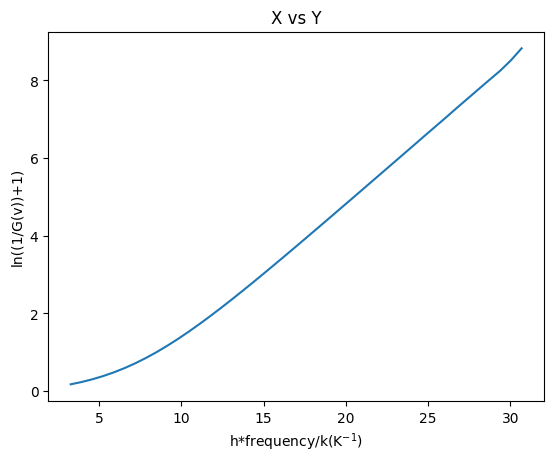

In [891]:
plt.plot(x,y)
plt.title('X vs Y')
plt.ylabel('ln((1/G(v))+1)')
plt.xlabel('h*frequency/k(K$^{-1}$)')
plt.savefig("X vs Y")

[ 0.33066692 -1.68514676]
3.0242
0.9957


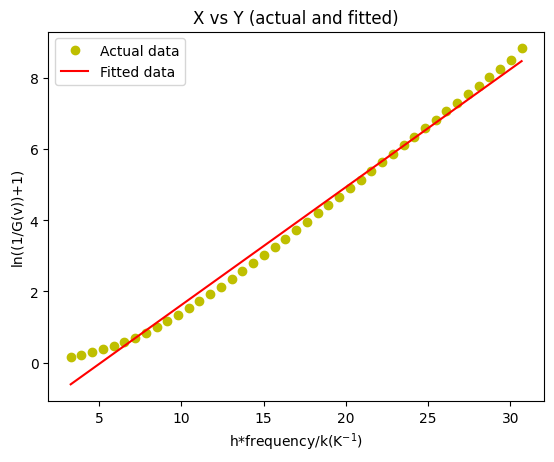

In [892]:
# Estimating the slope and intercept using the straight-line fitting
# Temperature=1/slope and u=intercept

model= np.polyfit(x, y, deg=1) #fitting a linear polynomial
#poly1d_fn = np.poly1d(model) 
print(model)
m,c=model #slope and intercept

#expected y
yhat=[np.zeros(size)]
for i in range(size):
    yhat.append(m*x[i]+c)
yhat=yhat[1:]
plt.plot(x,y, 'yo',x,yhat,'-r')
plt.title('X vs Y (actual and fitted)')
plt.ylabel('ln((1/G(v))+1)')
plt.xlabel('h*frequency/k(K$^{-1}$)')
plt.legend(['Actual data', 'Fitted data'], loc='upper left')
plt.savefig("X vs Y (actual and fitted)")


est_T=1/m #temp=1/slope
print('{0:.4f}'.format(est_T))
# R value
r=np.corrcoef(x,y)[0][1]
print('{0:.4f}'.format(r))


In [893]:
#curve fitting using linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(1/slope, intercept, r_value, '{0:.4f}'.format(p_value),std_err)

3.0241912176561025 -1.6851467572105716 0.995665616402371 0.0000 0.00482383976805235


In [894]:
# Uncertainity in temperature
#dT=-1/m^2(dm)
dt=(-1/m**2)*std_err
print('{0:.4f}'.format(dt))

-0.0441
